# Solución ecuación de onda - Cuerda fija a los dos extremos

Este código muestra la solución de la ecuación de onda 1D para el caso de una cuerda de longitud L atada a los dos extremos y a la cual se le da un pequeño pulso en el tiempo inicial. Las ecuaciones usadas en este código fueron obtenidas de manera analítica a mano. Puede encontrar más información en la carpeta DocPDF del repositorio.

Este trabajo fue elaborado por:

* Miguel Fernando Becerra Rodriguez
* Juan Andrés Guarín Rojas

## 0. Importación de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Creación de funciones de la solución

In [2]:
# Crear archivo para graficar solución a la ecuación de onda
%%writefile solver.py
import numpy as np

# Physical parameters
a=1
b=1
L=10
c=1

# Code parameters
N = 100
Nx = 100
Nt = 200

# Functions
def A_n(n):
    return 2*a/b * L/(n*np.pi)**2 * ( -np.sin(n*np.pi*2*b/L) + 2*np.sin(n*np.pi*b/L) )

A=[A_n(n) for n in range(1,N)]

def u_n(n,x,t):
    return A[n-1] * np.cos(c*n*np.pi*t/L)*np.sin(n*np.pi*x/L)

# Find solution
x = np.linspace(0,L,Nx)
t = np.linspace(0,20,Nt)
u = np.zeros((Nx,Nt))

for i in range(Nt):
    for j in range(Nx):
        for n in range(1,N):
            u[j,i] += u_n(n,x[j],t[i])

Writing met2.py


## 2. Ejecución del código

Este código se ejecuta en el entorno local de python. Se hizo de esta forma para intentar reducir el tiempo computacional.

In [3]:
%run solver.py

## 3. Graficas de la solución

### Estado inicial de la cuerda

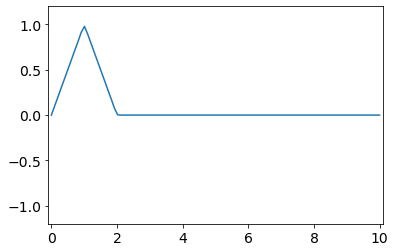

In [15]:
# Mostrar estado inicial
%matplotlib inline
j = 0
plt.figure(figsize=(6,4))
plt.plot(x,u[:,j])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-0.1,L+0.1)
plt.ylim(-0.2-b,b+0.2)
plt.show()

### Animación del movimiento de la cuerda

In [23]:
%matplotlib auto
%matplotlib auto
import matplotlib.animation as animation

stop = Nt
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

def update(j):
    ax.clear()
    ax.plot(x,u[:,j],'-b',label='t = %.1f'%(t[j]))
    plt.legend(loc='upper right')
    plt.xlim(-0.1,L+0.1)
    plt.ylim(-0.2-b,b+0.2)
    
ani = animation.FuncAnimation(fig,update,range(0,stop,1), repeat=True, interval=5, repeat_delay=1000)

save=True
if save:
    # Save and show animation
    ani.save('Wave_equation_fixed.mp4', writer='ffmpeg', dpi=450)
    plt.show()
else: 
    # Show animation
    plt.show()

Using matplotlib backend: TkAgg
Using matplotlib backend: TkAgg
